In [5]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer
from bltk.langtools import remove_stopwords
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


import collections
import nltk
import numpy as np
import pandas as pd
import codecs

In [6]:
from bltk.langtools.banglachars import(vowels,
                                      vowel_signs,
                                      consonants,
                                      digits,
                                      operators,
                                      punctuations,
                                      others)

In [7]:
print(f'vowels: {vowels}')

vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']


In [9]:
print(f'Vowel_Signs: {vowel_signs}')

Vowel_Signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']


In [10]:
print(f'Consonants: {consonants}')

Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']


In [11]:
print(f'Digits: {digits}')

Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']


In [12]:
print(f'Operators: {operators}')

Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']


In [13]:
print(f'Punctuations: {punctuations}')

Punctuations: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']


In [14]:
print(f'Others: {others}')

Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [16]:
import csv

input_file = 'youtube_comments_labeled_multilingual_with_banglish.csv'
#print(input_file)

stopwords_list = 'stopwords.txt'
#print(stopwords_list)

stopwords.txt


In [24]:
counter = collections.Counter()
tokenizer = Tokenizer()

maxlen = 0

xs,ys = [], []
bangla_stopwords = codecs.open(stopwords_list, 'r', encoding='utf-8').read().split()
#print(bangla_stopwords)
with codecs.open(input_file, 'r', encoding='utf-8') as fin:
    csv_reader = csv.reader(fin, delimiter=',')
    next(csv_reader)
    
    
    for line in csv_reader:
        try:
            label, sent = line[3], line[2]
            print('Lable', label)
            print('Sentence', sent)


            words = tokenizer.word_tokenizer(sent)
            print('After Tokenizing: ', words)

            punctuations = ['.', ',', ':', ';', '!', '?', '']
            wordsExcludingPunctuationMarks = [word for word in words if word not in punctuations]
            print("Truncating Punctuations: ", wordsExcludingPunctuationMarks)

            wordExcludingStopwords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
            print("Truncating Stopwords: ", wordExcludingStopwords)

            ys.append(int(label))
            xs.append(' '.join(wordExcludingStopwords))
            
        except IndexError:
             print('Error Procssing Line: ', line)

Lable 1
Sentence I have spent an productive hour with this video. I watched this video without skipping any sequence. The story telling was great from Shahrose vai. Currently,, I am studying in CSE but I like this type podcast by which I can spent my leisure time very productively and this video is one of them. Thanks a lot. Doing great guys.
After Tokenizing:  ['I', 'have', 'spent', 'an', 'productive', 'hour', 'with', 'this', 'video', '.', 'I', 'watched', 'this', 'video', 'without', 'skipping', 'any', 'sequence', '.', 'The', 'story', 'telling', 'was', 'great', 'from', 'Shahrose', 'vai', '.', 'Currently,', ',', 'I', 'am', 'studying', 'in', 'CSE', 'but', 'I', 'like', 'this', 'type', 'podcast', 'by', 'which', 'I', 'can', 'spent', 'my', 'leisure', 'time', 'very', 'productively', 'and', 'this', 'video', 'is', 'one', 'of', 'them', '.', 'Thanks', 'a', 'lot', '.', 'Doing', 'great', 'guys', '.']
Truncating Punctuations:  ['I', 'have', 'spent', 'an', 'productive', 'hour', 'with', 'this', 'video

Lable 2
Sentence Fahmid Al Nayeem Vaike 2 Cents Podcast এ দেখতে চাই, যিনি হলেন ডিজিটাল মার্কেটিং এর বস- যারা ভাইকে চিনেন,আশা করি সবাই একমত হবেন
After Tokenizing:  ['Fahmid', 'Al', 'Nayeem', 'Vaike', '2', 'Cents', 'Podcast', 'এ', 'দেখতে', 'চাই', ',', 'যিনি', 'হলেন', 'ডিজিটাল', 'মার্কেটিং', 'এর', 'বস-', 'যারা', 'ভাইকে', 'চিনেন,আশা', 'করি', 'সবাই', 'একমত', 'হবেন']
Truncating Punctuations:  ['Fahmid', 'Al', 'Nayeem', 'Vaike', '2', 'Cents', 'Podcast', 'এ', 'দেখতে', 'চাই', 'যিনি', 'হলেন', 'ডিজিটাল', 'মার্কেটিং', 'এর', 'বস-', 'যারা', 'ভাইকে', 'চিনেন,আশা', 'করি', 'সবাই', 'একমত', 'হবেন']
Truncating Stopwords:  ['Fahmid', 'Al', 'Nayeem', 'Vaike', '2', 'Cents', 'Podcast', 'চাই', 'হলেন', 'ডিজিটাল', 'মার্কেটিং', 'বস-', 'ভাইকে', 'চিনেন,আশা', 'সবাই', 'একমত']
Lable 1
Sentence সত্যিই অসাধারণ। কখন যে সময় শেষ হয়েছে বুঝতেই পারলাম না। আরও শোনার জন্য প্রস্তুত ছিলাম কিন্তু ততক্ষণে শেষ।
After Tokenizing:  ['সত্যিই', 'অসাধারণ', '।', 'কখন', 'যে', 'সময়', 'শেষ', 'হয়েছে', 'বুঝতেই', 'পারলাম', 'না', '।', 'আরও', 'শোন

Lable 2
Sentence ভাই এসব কপিবাজদের কোথা থেকে ধরে নিয়ে এসে চেয়ারে বসান। এর বেশিরভাগ কথা মুজতাহিদ ভাইয়ের থেকে কপি করে নেওয়া।
After Tokenizing:  ['ভাই', 'এসব', 'কপিবাজদের', 'কোথা', 'থেকে', 'ধরে', 'নিয়ে', 'এসে', 'চেয়ারে', 'বসান', '।', 'এর', 'বেশিরভাগ', 'কথা', 'মুজতাহিদ', 'ভাইয়ের', 'থেকে', 'কপি', 'করে', 'নেওয়া', '।']
Truncating Punctuations:  ['ভাই', 'এসব', 'কপিবাজদের', 'কোথা', 'থেকে', 'ধরে', 'নিয়ে', 'এসে', 'চেয়ারে', 'বসান', '।', 'এর', 'বেশিরভাগ', 'কথা', 'মুজতাহিদ', 'ভাইয়ের', 'থেকে', 'কপি', 'করে', 'নেওয়া', '।']
Truncating Stopwords:  ['ভাই', 'এসব', 'কপিবাজদের', 'কোথা', 'চেয়ারে', 'বসান', '।', 'বেশিরভাগ', 'কথা', 'মুজতাহিদ', 'ভাইয়ের', 'কপি', '।']
Lable 1
Sentence apni nijer marketing ta o valo korte perechen good job
After Tokenizing:  ['apni', 'nijer', 'marketing', 'ta', 'o', 'valo', 'korte', 'perechen', 'good', 'job']
Truncating Punctuations:  ['apni', 'nijer', 'marketing', 'ta', 'o', 'valo', 'korte', 'perechen', 'good', 'job']
Truncating Stopwords:  ['apni', 'nijer', 'marketing', 'ta', 'o',

Lable 2
Sentence সাহরোজ ফারদি ভাইকে আমি চিনি ২ বছর থেকে... আমি উনার অনেক কোর্স কিনেছি... ads making,  animation এইগুলও....
After Tokenizing:  ['সাহরোজ', 'ফারদি', 'ভাইকে', 'আমি', 'চিনি', '২', 'বছর', 'থেকে..', '.', 'আমি', 'উনার', 'অনেক', 'কোর্স', 'কিনেছি..', '.', 'ads', 'making', ',', 'animation', 'এইগুলও...', '.']
Truncating Punctuations:  ['সাহরোজ', 'ফারদি', 'ভাইকে', 'আমি', 'চিনি', '২', 'বছর', 'থেকে..', 'আমি', 'উনার', 'অনেক', 'কোর্স', 'কিনেছি..', 'ads', 'making', 'animation', 'এইগুলও...']
Truncating Stopwords:  ['সাহরোজ', 'ফারদি', 'ভাইকে', 'চিনি', '২', 'বছর', 'থেকে..', 'উনার', 'কোর্স', 'কিনেছি..', 'ads', 'making', 'animation', 'এইগুলও...']
Lable 1
Sentence Best Podcast... Best of luck vaiya ️
After Tokenizing:  ['Best', 'Podcast..', '.', 'Best', 'of', 'luck', 'vaiya', '️']
Truncating Punctuations:  ['Best', 'Podcast..', 'Best', 'of', 'luck', 'vaiya', '️']
Truncating Stopwords:  ['Best', 'Podcast..', 'Best', 'of', 'luck', 'vaiya', '️']
Lable 2
Sentence আসলে ফারদি ভাই অসাধারন একজন,উনার ক

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
ys

[1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,


In [26]:
xs

['I have spent an productive hour with this video I watched this video without skipping any sequence The story telling was great from Shahrose vai Currently, I am studying in CSE but I like this type podcast by which I can spent my leisure time very productively and this video is one of them Thanks a lot Doing great guys',
 'One of the best postcard in 2cent podcast Love from dhaka ️ thanks for sharing your thoughs and we know you are the greatest mentor in the field Difference between you and other marketer They teach how it will works and you know whats going on in the audience and what they want️',
 'Thank you Nafeez bhai to invite him this extra ordinary session',
 'নাফিস ভাই দক্ষিণ এশিয়ার সেরা উদ্যোক্তা পুরস্কার প্রাপ্ত বাংলাদেশের জনপ্রিয় অ্যাপস ডেভেলপার মো জোবায়ের হোসেন ভাই আপনাদের পোগ্রামে চাই প্লিজ প্লিজ প্লিজ',
 "things I learnt in a new fashion -> you can start with zero capital creating ( content funneling people who want to read it to an ebook ) -> storytelling capturing

# TF-IDF

In [27]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['ফ্রিল্যান্সিং সেক্টরে গাইডলাইন প্রয়োজন',
 "Met Sazzad vaia today at Jolshiri central park in Adamjee's Study tour",
 'চমৎকার আলোচনা । ShahRose Fardi ভাই সত্যিকার অর্থেই একজন অসাধারণ ব্যাক্তি ।',
 '',
 'সম্পূর্ণ ভিডিও দেখলাম তত্ত্ব বহুল আলোচনা ।',
 'Bring Numeri sattar apar from ACS He recently generated 12 crores from a single course(2 )',
 'অসাধারণ ভাই আশাকরি সাথে সামনা-সামনি একদিন একসাথে চা পান করবো ইনশাআল্লাহ',
 'Looks Great Sazzad bhai',
 '',
 'Love you trainer Saharose Fardi',
 'onek kisu shikhlam',
 '',
 'ফ্রিল্যান্সিং সেক্টরে গাইডলাইন প্রয়োজন',
 'একটাবারো এক্স মেন্টর মোজতাহিদুল ইসলামের কথা না আরে কথাগুলো বলতেছেন এইগুলো মেন্টর মোজতাহিদুল ইসলামের কোর্সের দেখানো কথাগুলো শুধুমাত্র একটু রং চং মিশিয়ে বলতেছেন ।',
 'দোয়া আমাদেরও আল্লাহ ভালো রাখছে',
 'শুধু সফল ব্যক্তিদের নয় সৈল নয় তাদেরকে প্রোগ্রাম',
 'ফারদি ভাইয়ের কোর্স এগুলো পাই নি । পিছিয়ে । ধন্যবাদ ফারদি ভাইয়া দেয়ার জন্যে । দোয়া আরো অনেকদুর এগিয়ে ।',
 'হালকা গুলো তাড়ানো হক',
 'go ahead brother,its gonna viral and you really deser

In [28]:
Xtest

['Excellent !!',
 'ভাই পারলাম ভালো লাগলো সারস ফারদিন ভাই মানেই ভিন্ন আল্লাহ তাআলা আপনাকে সুস্থ রাখুক',
 '️️️',
 'Fahmid Al Nayeem Vaike 2 Cents Podcast চাই হলেন ডিজিটাল মার্কেটিং বস- ভাইকে চিনেন,আশা সবাই একমত',
 'I think this podcast will be hit',
 'সত্যিই অসাধারণ । কখন সময় শেষ হয়েছে বুঝতেই পারলাম না । শোনার প্রস্তুত ছিলাম ততক্ষণে শেষ ।',
 'ধন্যবাদ ফারদি ভাইয়াকে । স্টোরি টেলিং টাইপের এড মানুষের হৃদয় ছোঁয়া একটা প্রোডাক্টের এতটা আকর্ষিত এটার সত্যিকার অর্থে অনুধাবনটা আজকে ।',
 '2 cent podcast দেখি কাল\u200c প্রতারণা প্রমোট করছে।\u200cআশা করি\u200cএর invite সময় income মানুষ হিসেবে কেমন জানবেন । আপনারা নিজেরাও মানুষ চেনার skill টা বাড়ান ।',
 'hero',
 'he is talking too much i saw his fb videos after sixty videos he came in the point but good luck for all dm',
 'ওনার এজেন্সির নাম',
 'Last example ta @TawhidAfridi#showoff',
 'Best episode',
 'This is literally the best podcast on the 2 cents podcast You just listen to his words',
 'Awesome',
 'What a talk',
 'অডিয়েন্স সাইকোলজি বুঝে পিডিএ

In [29]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
Xtrain_tf = tfidf.fit_transform(Xtrain)
print('n_samples: %d, n_features: %d' % Xtrain_tf.shape)

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


n_samples: 2943, n_features: 6390


In [30]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print('n_sample: %d, n_features: %d' % Xtest_tf.shape)

n_sample: 981, n_features: 6390


# Naive Bayes

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)

# Predicated y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

[[  4   0   0]
 [  0 285   0]
 [  0   0 692]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       692

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



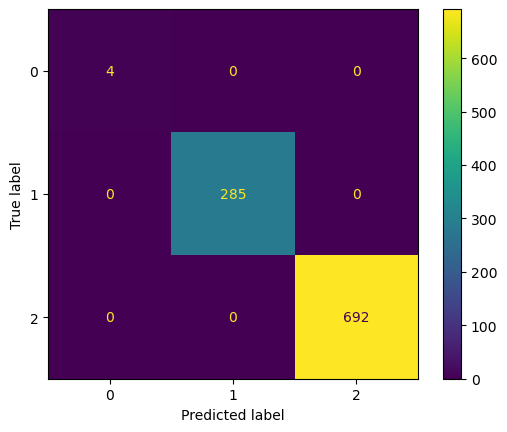

In [33]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

# For vizulize 

cm = confusion_matrix(Ytest, y_pred, labels=naive_bayes_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=naive_bayes_classifier.classes_)

disp.plot()
plt.show()

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
LRClassification = LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred = LRClassification.predict(Xtest_tf)

[[  4   0   0]
 [  0 285   0]
 [  0   0 692]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       692

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



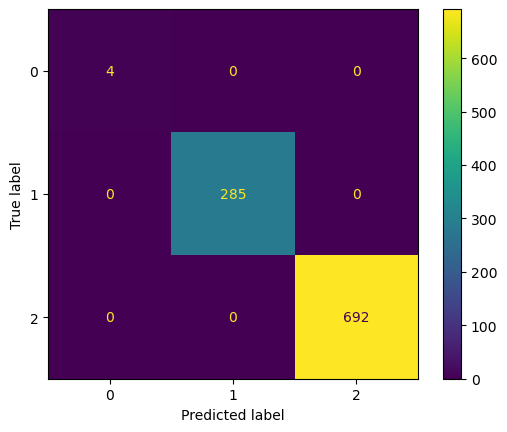

In [38]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=LRClassification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=LRClassification.classes_)

disp.plot()
plt.show()

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTClassification = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred = DTClassification.predict(Xtest_tf)

[[  4   0   0]
 [  0 285   0]
 [  0   0 692]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       692

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



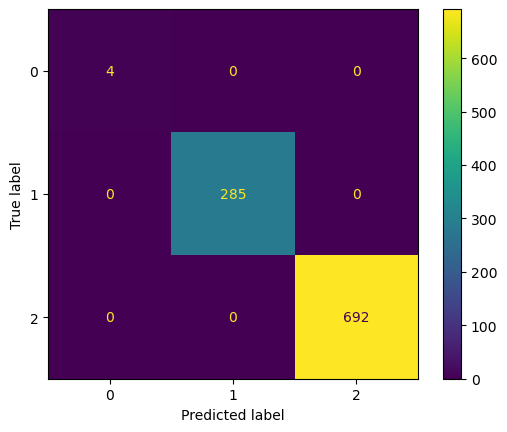

In [44]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=DTClassification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=DTClassification.classes_)

disp.plot()
plt.show()

# SVM(Support Vector Machine)

In [46]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear model
# Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
# Predict the responses for test dataset
y_pred = clf.predict(Xtest_tf)

[[  4   0   0]
 [  0 285   0]
 [  0   0 692]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       692

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



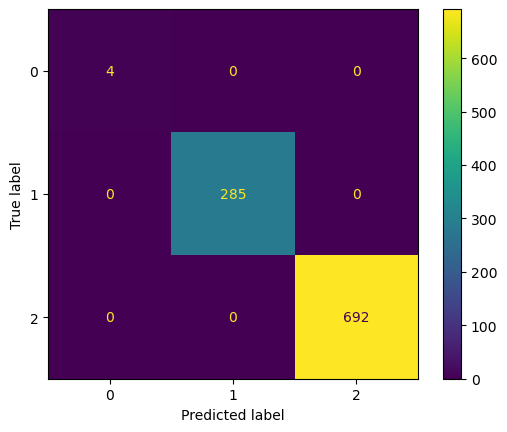

In [50]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)

disp.plot()
plt.show()

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifer = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred = rf_classifer.predict(Xtest_tf)

[[  4   0   0]
 [  0 285   0]
 [  0   0 692]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       692

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



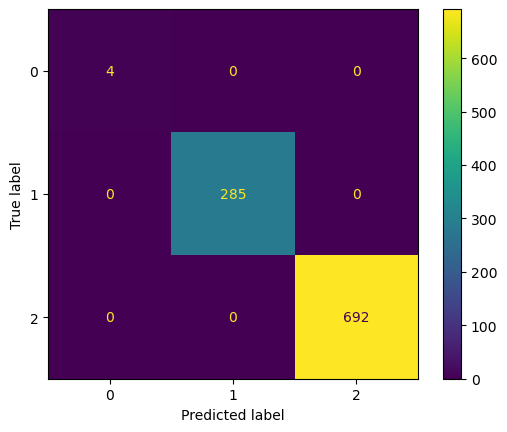

In [55]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=rf_classifer.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_classifer.classes_)

disp.plot()
plt.show()

# SGD(Stochastic gradient descent)

In [59]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'squared_error',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred = sgd_classifier.predict(Xtest_tf)

[[  0   4   0]
 [ 36 181  68]
 [ 97 550  45]]
0.23037716615698267
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.25      0.64      0.35       285
           2       0.40      0.07      0.11       692

    accuracy                           0.23       981
   macro avg       0.21      0.23      0.16       981
weighted avg       0.35      0.23      0.18       981



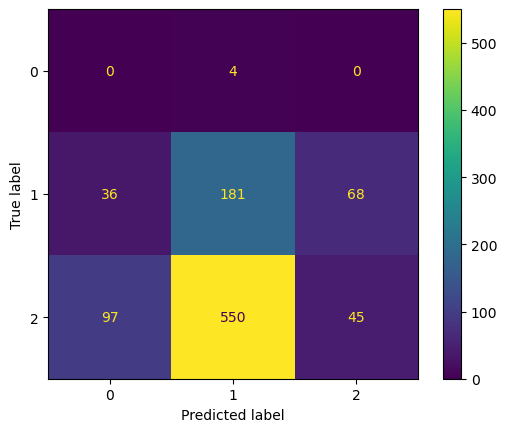

In [62]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))


cm = confusion_matrix(Ytest, y_pred, labels=sgd_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=sgd_classifier.classes_)

disp.plot()
plt.show()

# RandomizedSearchCV

In [65]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

# Random Search for 20 Combinations of Parameters
rand_list = {"C": stats.uniform(2, 10),
             "gamma" : stats.uniform(0.1, 1),
             'kernel': ['rbf']}

rand_search = RandomizedSearchCV(svm_clf, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)
rand_search.fit(Xtrain_tf, Ytrain)
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)

[[  0   4   0]
 [ 36 181  68]
 [ 97 550  45]]
0.23037716615698267
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.25      0.64      0.35       285
           2       0.40      0.07      0.11       692

    accuracy                           0.23       981
   macro avg       0.21      0.23      0.16       981
weighted avg       0.35      0.23      0.18       981



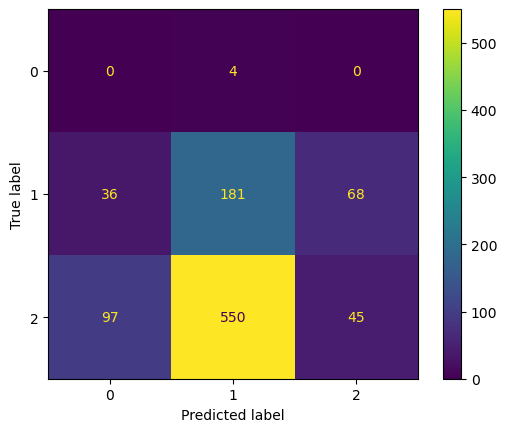

In [67]:
print(confusion_matrix(Ytest, y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=rand_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rand_search.classes_)

disp.plot()
plt.show()

# Adaboost

[[  4   0   0]
 [  0 280   5]
 [  0   0 692]]
0.9949031600407747
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.98      0.99       285
           2       0.99      1.00      1.00       692

    accuracy                           0.99       981
   macro avg       1.00      0.99      1.00       981
weighted avg       0.99      0.99      0.99       981



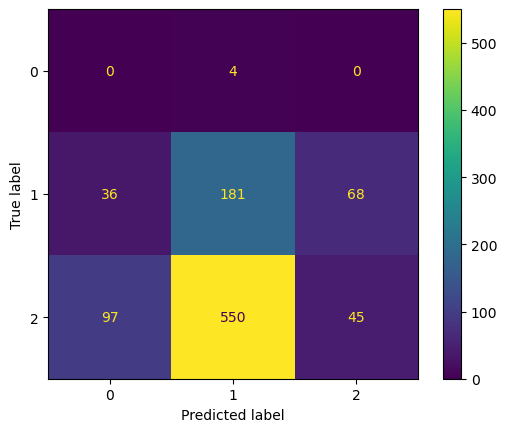

In [69]:
from sklearn.ensemble import AdaBoostClassifier


# Create and train AdaBoost classifer
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost_classifier.fit(Xtrain_tf, Ytrain)

# Make Predicitions
y_pred_adaboost = adaboost_classifier.predict(Xtest_tf)

# Print evaluation metrics
print(confusion_matrix(Ytest, y_pred_adaboost))
print(accuracy_score(Ytest, y_pred_adaboost))
print(classification_report(Ytest, y_pred_adaboost))


# Plot confusion matrix
cm_adaboost = confusion_matrix(Ytest, y_pred_adaboost, labels=adaboost_classifier.classes_)
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=adaboost_classifier.classes_)

disp_adaboost.plot()
plt.show()

# GBM(Gradient Boosting Machine)

[[  4   0   0]
 [  0 285   0]
 [  0   0 692]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       692

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



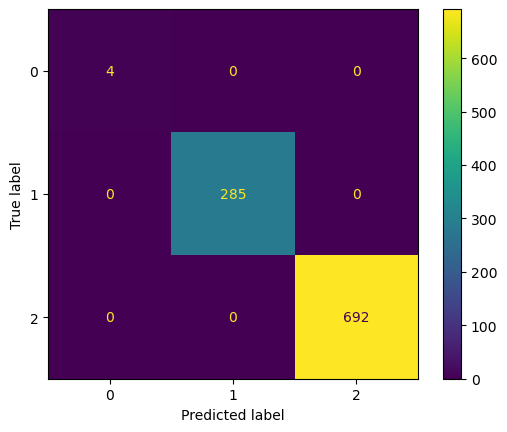

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming Xtrain_tf, Ytrain, Xtest_tf, Ytest are already defined

# Create and train Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbm_classifier.fit(Xtrain_tf, Ytrain)


# Make Predictions
y_pred_gbm = gbm_classifier.predict(Xtest_tf)

# Print Evaluation matrics
print(confusion_matrix(Ytest, y_pred_gbm))
print(accuracy_score(Ytest, y_pred_gbm))
print(classification_report(Ytest, y_pred_gbm))

# Plot confusion matrix
cm_gbm = confusion_matrix(Ytest, y_pred_gbm, labels=gbm_classifier.classes_)
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_gbm,
                                 display_labels=gbm_classifier.classes_)

disp_gbm.plot()
plt.show()